# **Edge Detection using Canny edge detector**

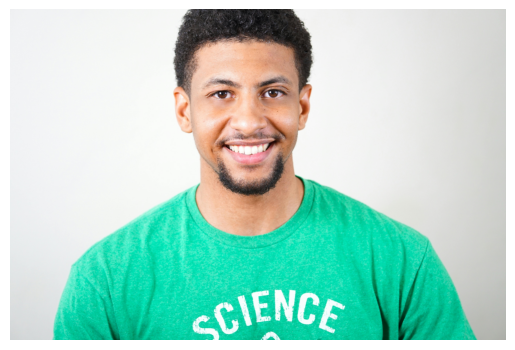

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
image_path = 'pic.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


(-0.5, 5999.5, 3999.5, -0.5)

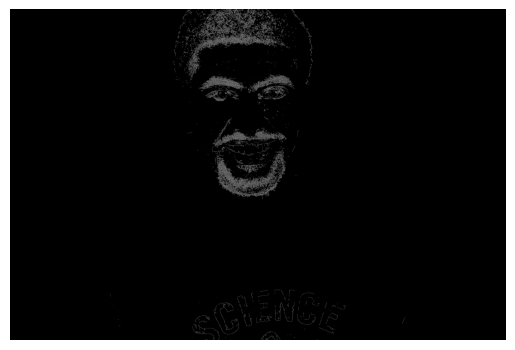

In [2]:
gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis('off')


# **Edge Detection using Sobel Y, sobel X, Laplacian and Scharr**

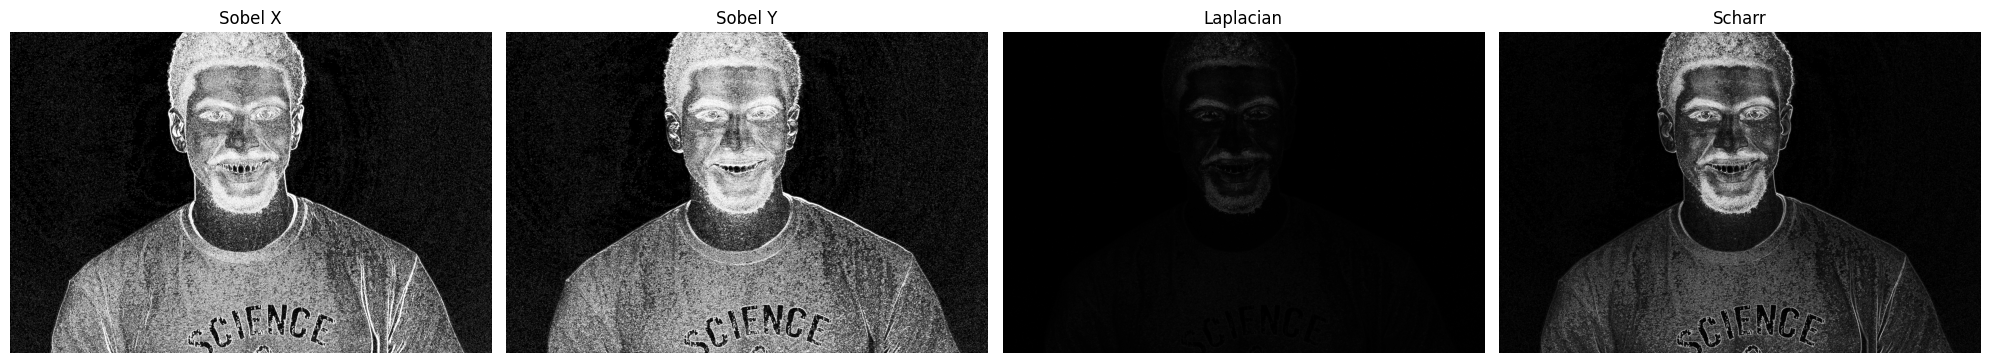

In [3]:
def apply_edge_detection(gray_img):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
    sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)

    laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)

    scharr_x = cv2.Scharr(gray_img, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray_img, cv2.CV_64F, 0, 1)

    axes[0].imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
    axes[0].set_title('Sobel X')
    axes[0].axis('off')

    axes[1].imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
    axes[1].set_title('Sobel Y')
    axes[1].axis('off')

    axes[2].imshow(cv2.convertScaleAbs(laplacian), cmap='gray')
    axes[2].set_title('Laplacian')
    axes[2].axis('off')

    combined_scharr = cv2.addWeighted(cv2.convertScaleAbs(scharr_x), 0.5, cv2.convertScaleAbs(scharr_y), 0.5, 0)
    axes[3].imshow(combined_scharr, cmap='gray')
    axes[3].set_title('Scharr')
    axes[3].axis('off')
    plt.tight_layout()
    plt.show()

apply_edge_detection(gray_image)


# **Working of the approaches used for edge detection**

**Canny Edge Detector:** The Canny edge detection algorithm is a multi-stage process. This includes first smoothing the image with a Gaussian filter to reduce noise. It then finds the intensity gradients of the image and applies non-maximum suppression to get rid of spurious response to edge detection. Finally, it uses double threshold to determine potential edges.
Following this is the procedure of edge tracking by hysteresis, which would suppress all other edges that are weak and not connected to strong edges. This finally gives a binary image reflecting the points of the edge detected.

**Sobel Operator:** The Sobel operator is used for edge detection and operates by convolving the image with a pair of 3x3 kernels.
The kernels are designed to respond maximally to edges running vertically and horizontally relative to the pixel grid, one kernel for each of the two perpendicular orientations. The operator represents the gradient of image intensity at each point that gives the direction of steepest possible increase from light to dark and its rate of change.

**Laplacian Operator:** The Laplacian operator is a measure of the second spatial derivative of the image, which will provide us with points in the image where the intensity changes rapidly. It computes the Laplacian of the image given by the sum of the second derivatives over the image for smoothing; it is most often applied to an image that has first been smoothed with something approximating a Gaussian Smoothing filter in order to reduce sensitivity to noise.

 **Scharr Operator:** The Scharr operator is a simpler kind of the Sobel operator and provides better results for the detection of edges in pictures. As a result, it is not very sensitive to better use when the operator with large kernels is not necessary. The Scharr operator has separate kernels to detect horizontal and vertical changes in the image.

# **Segmentation using K Means Clustering**

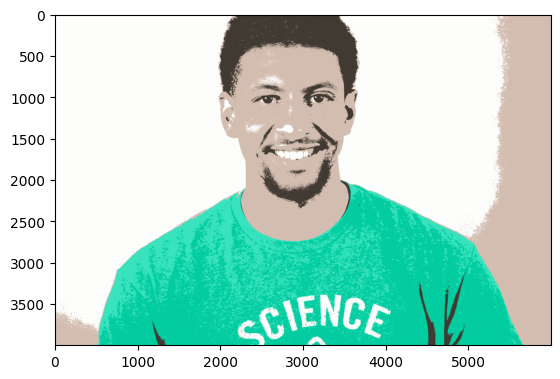

In [ ]:
image = cv2.imread('pic.jpg')

# Convert the color space from BGR to RGB for displaying with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (flattening it) and three color values
pixel_vals = image.reshape((-1,3))

# Convert to floating point for the k-means function
pixel_vals = np.float32(pixel_vals)

# Define the criteria for stopping the algorithm. iteration will stop after a specified number of iterations
# or a certain accuracy is achieved whichever comes first.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Number of clusters
k = 5

# Apply k-means algorithm to find centers of clusters in the image data
# 'retval' is the compactness measure that returns the sum of squared distances from each point to their corresponding centers
# 'labels' are the label array where each element marked '0', '1'... represents the cluster it belongs to
# 'centers' are the center points of the clusters
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to 8 bit values
centers = np.uint8(centers)

# Map each pixel to the center of its cluster
segmented_data = centers[labels.flatten()]

# Reshape the data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Display the segmented image
plt.imshow(segmented_image)
plt.show()

# **Using Pretrained Classifier**

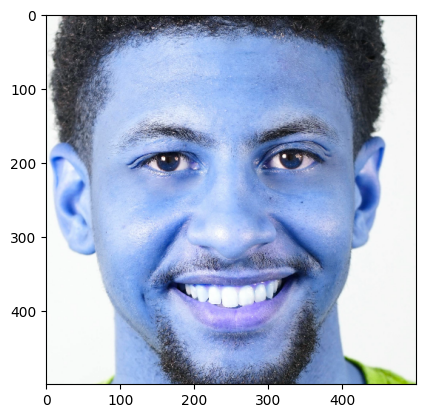

In [9]:
import cv2
import numpy as np
image = cv2.imread('pic.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
if faces is not None and len(faces) > 0:
    x, y, w, h = faces[0]
    cropped_face = image[y:y+h, x:x+w]
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
    desired_size = (500, 500)
    resized_face = cv2.resize(cropped_face, desired_size)
    plt.imshow(resized_face)
    plt.show()

First, we convert the image to grayscale, and then we use the Haar cascade face detection algorithm, which is the OpenCV's "haarcascade_frontalface_default.xml", a pre-trained classifier. This is done to identify the face in the image. After detecting the face, we crop the area of the face to isolate it. Then, we convert it back to RGB for display. We loop through to find each face and then crop it.